In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

from preprocessing import scale_series, split_train_test, create_sequences, clean_stock_dataframe, plot_initial_series
from model_builder import build_lstm_model, train_model
from forecasting import predict_and_inverse, forecast_next_days, plot_train_predictions, plot_test_predictions, plot_results, plot_future_window

In [3]:
# PARAMETERS
time_step = 100
future_days = 30
epochs = 100

In [ ]:
# Download the Dataset
df = yf.download("AAPL", start="2015-05-01", end="2025-06-01")
# df = yf.download("GOOGL", start="2015-05-01", end="2025-06-01")    # Can be done for any dataset

df.to_csv('AAPL.csv')

# Load data
df = pd.read_csv("AAPL.csv")

# CLEANING STEP
df = clean_stock_dataframe(df)

C:\Users\acer\AppData\Local\Temp\ipykernel_38040\1293901100.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-05-01", end="2025-06-01")
[*********************100%***********************]  1 of 1 completed
d:\Project\ML\StockPricePrediction\preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[price_column] = df[price_column].astype(float)


In [5]:
# Dataset
df.head()

,Price,Close,High,Low,Open,Volume
0,2015-05-01,28.699959,28.962589122392625,27.88759217131115,28.06564441021307,234050400
1,2015-05-04,28.644321,29.06052330317985,28.546391591878752,28.822375405226378,203953200
2,2015-05-05,27.998877,28.588676652922196,27.99442428912783,28.52190599939661,197085600
3,2015-05-06,27.823051,28.210316865514486,27.455816218919747,28.168028667666032,288564000
4,2015-05-07,27.995140,28.17840692804765,27.718003504681537,27.88562568812943,175763600


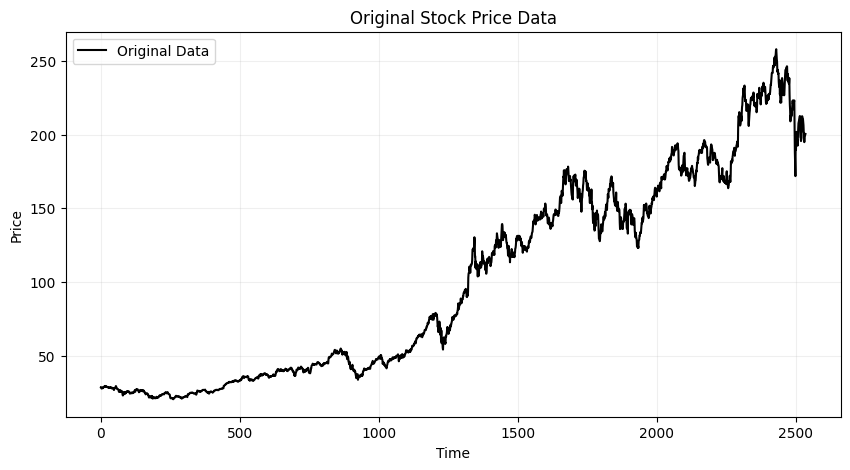

In [6]:
# Plot the raw data
plot_initial_series(df["Close"])

In [7]:
# Preprocess
scaled, scaler = scale_series(df["Close"])
train_data, test_data = split_train_test(scaled, train_ratio=0.65)

In [8]:
# Create sequences
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [9]:
# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

In [10]:
# Build and train model
model = build_lstm_model(time_step=time_step, n_units=50, n_layers=3)
train_model(model, X_train, y_train, X_test, y_test, epochs=epochs)

Epoch 1/100


c:\Users\acer\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0107 - val_loss: 0.0020
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 5.6397e-04 - val_loss: 0.0018
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 2.6255e-04 - val_loss: 0.0018
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 2.4354e-04 - val_loss: 0.0021
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 2.3010e-04 - val_loss: 0.0027
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 2.4240e-04 - val_loss: 0.0034
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 2.2372e-04 - val_loss: 0.0035
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 2.2516e-04 - val_loss: 0.0018
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 2.2971e-04 - val_loss: 0.0024
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 2.0458e-04 - val_loss: 0.0030
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 1.9750e-04 - val_loss: 0.0040
Epoch 12/100
25/25 ━━━━

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


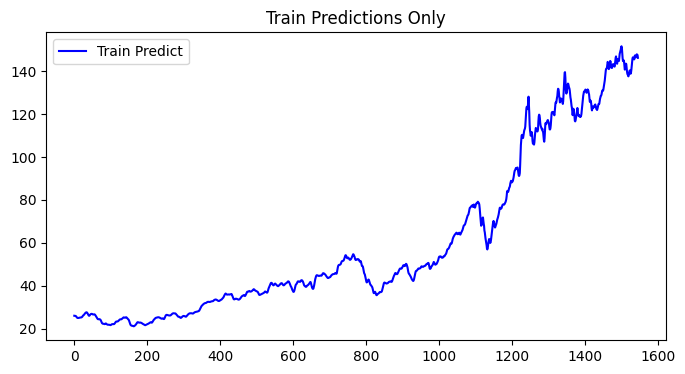

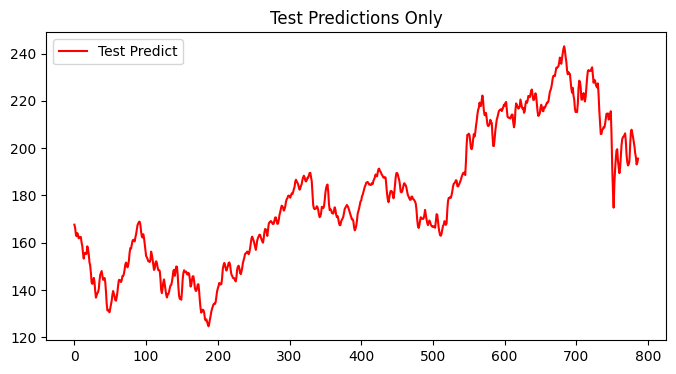

In [11]:
# Predictions
train_pred, test_pred = predict_and_inverse(model, X_train, X_test, scaler)

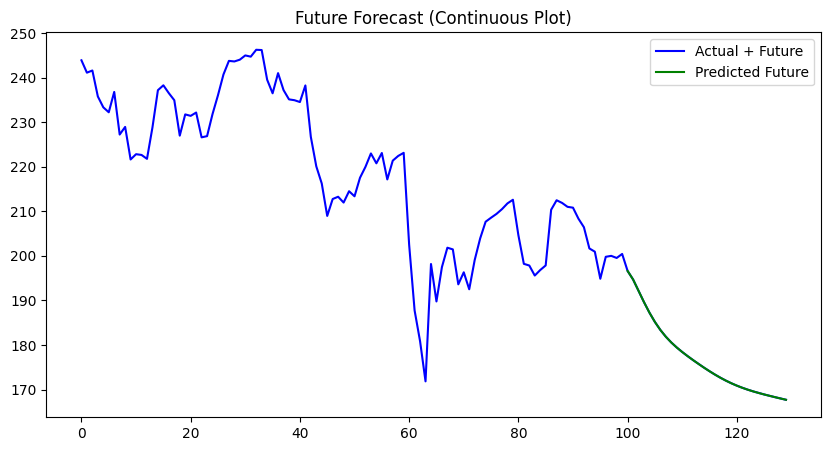

In [12]:
# Forecast future prices
future_pred = forecast_next_days(model, test_data, scaler, time_step=time_step, n_days=future_days)
plot_future_window(test_data, future_pred, scaler, time_step=time_step)

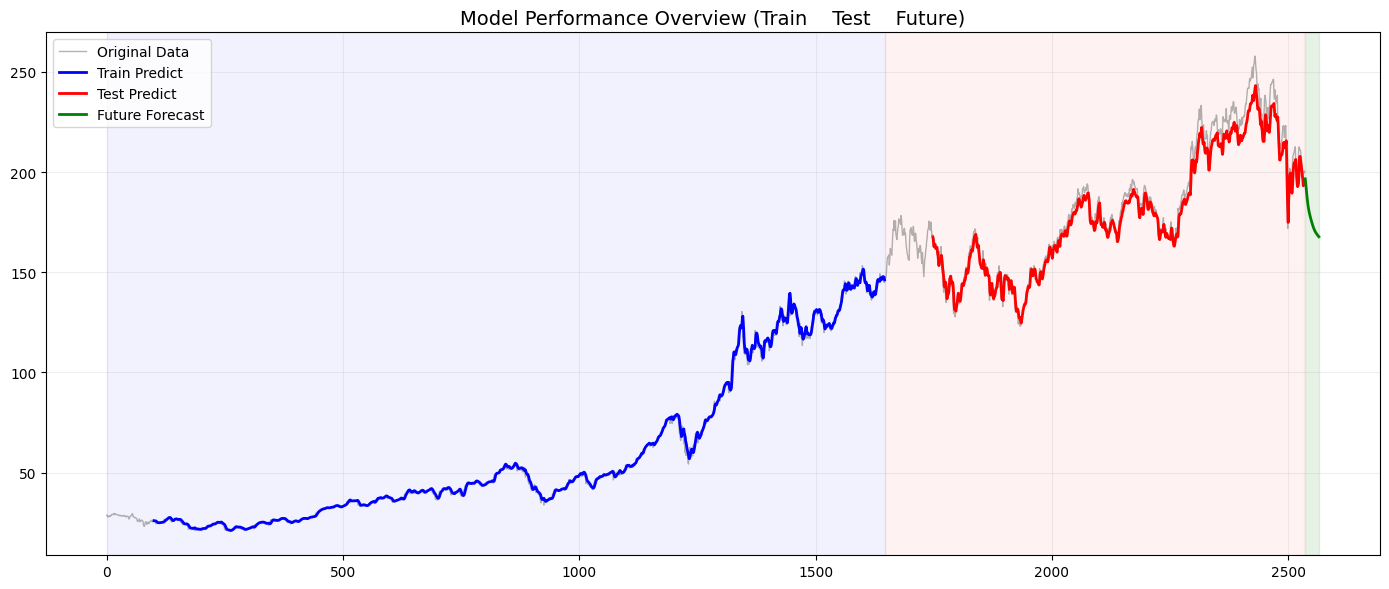

In [13]:
# Plot everything
plot_results(scaled, train_pred, test_pred, future_pred, scaler, look_back=time_step)